About Dataset

This data set contains 13 clinicopathologic features aiming to predict recurrence of well differentiated thyroid cancer. 
The data set was collected in duration of 15 years and each patient was followed for at least 10 years.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Thyroid_Diff.csv')

df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [3]:
# Age: The age of the patient at the time of diagnosis or treatment.
# Gender: The gender of the patient (male or female).
# Smoking: Whether the patient is a smoker or not.
# Hx Smoking: Smoking history of the patient (e.g., whether they have ever smoked).
# Hx Radiotherapy: History of radiotherapy treatment for any condition.
# Thyroid Function: The status of thyroid function, possibly indicating if there are any abnormalities.
# Physical Examination: Findings from a physical examination of the patient, which may include palpation of the thyroid gland and surrounding structures.
# Adenopathy: Presence or absence of enlarged lymph nodes (adenopathy) in the neck region.
# Pathology: Specific types of thyroid cancer as determined by pathology examination of biopsy samples.
# Focality: Whether the cancer is unifocal (limited to one location) or multifocal (present in multiple locations).
# Risk: The risk category of the cancer based on various factors, such as tumor size, extent of spread, and histological type.
# T: Tumor classification based on its size and extent of invasion into nearby structures.
# N: Nodal classification indicating the involvement of lymph nodes.
# M: Metastasis classification indicating the presence or absence of distant metastases.
# Stage: The overall stage of the cancer, typically determined by combining T, N, and M classifications.
# Response: Response to treatment, indicating whether the cancer responded positively, negatively, or remained stable after treatment.
# Recurred: Indicates whether the cancer has recurred after initial treatment.

# EDA and Data preprocessing

In [4]:
# rename the column

df.rename(columns={'Hx Smoking': 'Smoking History',
                   'Hx Radiothreapy': 'Radiotherapy History',
                   'Pathology': 'Types of Thyroid Cancer (Pathology)',
                   'T': 'Tumor',
                   'N': 'Lymph Nodes',
                   'M': 'Cancer Metastasis',
                  'Response' : 'Treatment Response'}, inplace=True)

In [5]:
df.head()

,Age,Gender,Smoking,Smoking History,Radiotherapy History,Thyroid Function,Physical Examination,Adenopathy,Types of Thyroid Cancer (Pathology),Focality,Risk,Tumor,Lymph Nodes,Cancer Metastasis,Stage,Treatment Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [6]:
df['Recurred'].replace({'No': 0,'Yes': 1}, inplace=True)

df['Gender'].replace({'M':1,'F':0}, inplace=True)

df['Smoking'].replace({'Yes':1,'No':0}, inplace=True)

df['Cancer Metastasis'].replace({'M0':0,'M1':1}, inplace=True)

df.sample(2)

,Age,Gender,Smoking,Smoking History,Radiotherapy History,Thyroid Function,Physical Examination,Adenopathy,Types of Thyroid Cancer (Pathology),Focality,Risk,Tumor,Lymph Nodes,Cancer Metastasis,Stage,Treatment Response,Recurred
326,35,0,0,No,No,Euthyroid,Single nodular goiter-right,Right,Papillary,Multi-Focal,Intermediate,T3a,N1a,0,I,Biochemical Incomplete,1
184,67,0,0,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T2,N0,0,I,Excellent,0


In [7]:
df.nunique()

Age                                    65
Gender                                  2
Smoking                                 2
Smoking History                         2
Radiotherapy History                    2
Thyroid Function                        5
Physical Examination                    5
Adenopathy                              6
Types of Thyroid Cancer (Pathology)     4
Focality                                2
Risk                                    3
Tumor                                   7
Lymph Nodes                             3
Cancer Metastasis                       2
Stage                                   5
Treatment Response                      4
Recurred                                2
dtype: int64

In [8]:
df.duplicated().sum()

19

In [9]:
df.drop_duplicates()

df.head()

,Age,Gender,Smoking,Smoking History,Radiotherapy History,Thyroid Function,Physical Examination,Adenopathy,Types of Thyroid Cancer (Pathology),Focality,Risk,Tumor,Lymph Nodes,Cancer Metastasis,Stage,Treatment Response,Recurred
0,27,0,0,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,0,I,Indeterminate,0
1,34,0,0,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,0,I,Excellent,0
2,30,0,0,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,0,I,Excellent,0
3,62,0,0,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,0,I,Excellent,0
4,62,0,0,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,0,I,Excellent,0


In [10]:
df.shape

(383, 17)

In [11]:
df['Risk'].value_counts()

Low             249
Intermediate    102
High             32
Name: Risk, dtype: int64

In [12]:
df['Recurred'].value_counts()

0    275
1    108
Name: Recurred, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder

# Specify categorical columns
categorical_columns = ['Stage','Smoking History','Radiotherapy History','Thyroid Function','Physical Examination','Adenopathy','Types of Thyroid Cancer (Pathology)','Focality','Tumor','Lymph Nodes','Treatment Response']

label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col + '_en'] = label_encoder.fit_transform(df[col])

# Drop the original categorical columns
df.drop(categorical_columns, axis=1, inplace=True)

df.sample(5)

,Age,Gender,Smoking,Risk,Cancer Metastasis,Recurred,Stage_en,Smoking History_en,Radiotherapy History_en,Thyroid Function_en,Physical Examination_en,Adenopathy_en,Types of Thyroid Cancer (Pathology)_en,Focality_en,Tumor_en,Lymph Nodes_en,Treatment Response_en
273,45,0,0,Low,0,0,0,0,0,1,3,3,3,0,3,0,2
116,33,0,0,Low,0,0,0,0,0,2,3,3,3,1,2,0,1
99,28,0,0,Low,0,0,0,0,0,2,4,3,0,1,2,0,1
61,35,0,0,Low,0,0,0,0,0,2,4,3,3,1,1,0,1
161,22,0,0,Low,0,0,0,0,0,2,4,3,3,1,2,0,1


In [14]:
from sklearn.preprocessing import OrdinalEncoder

# Define the order of categories for the 'Risk' column
categories = [['Low', 'Intermediate', 'High']] 

# Initialize OrdinalEncoder with specified categories
oe = OrdinalEncoder(categories=categories)

# Fit and transform the ordinal encoding
df['Risk'] = oe.fit_transform(df[['Risk']])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     383 non-null    int64  
 1   Gender                                  383 non-null    int64  
 2   Smoking                                 383 non-null    int64  
 3   Risk                                    383 non-null    float64
 4   Cancer Metastasis                       383 non-null    int64  
 5   Recurred                                383 non-null    int64  
 6   Stage_en                                383 non-null    int32  
 7   Smoking History_en                      383 non-null    int32  
 8   Radiotherapy History_en                 383 non-null    int32  
 9   Thyroid Function_en                     383 non-null    int32  
 10  Physical Examination_en                 383 non-null    int32 

# Divide feature variable and target variable in X and y

In [16]:
X = df.drop('Recurred', axis=1)
y = df['Recurred']

# Select best feature using SelectKbest method based on ANOVA F-test

In [17]:
# Select the top 10 features based on ANOVA F-test

best_features = SelectKBest(score_func=f_classif, k=10)

fit = best_features.fit(X,y)

dataset_scores = pd.DataFrame(fit.scores_)

dataset_columns = pd.DataFrame(X.columns)

#concatenate datafreames
features_scores = pd.concat([dataset_columns,dataset_scores],axis=1)

features_scores.columns = ['Feature_name','Score']

print(features_scores.nlargest(10,'Score'))

             Feature_name       Score
3                    Risk  443.390121
15  Treatment Response_en  385.013106
14         Lymph Nodes_en  253.823287
13               Tumor_en  170.661941
5                Stage_en   96.278731
12            Focality_en   65.807733
4       Cancer Metastasis   54.712794
2                 Smoking   47.595845
1                  Gender   45.990326
0                     Age   27.372236


In [18]:
df_1 = df[['Risk','Treatment Response_en','Lymph Nodes_en','Tumor_en','Stage_en','Focality_en','Cancer Metastasis','Smoking','Gender','Age']]

df_1.head()

,Risk,Treatment Response_en,Lymph Nodes_en,Tumor_en,Stage_en,Focality_en,Cancer Metastasis,Smoking,Gender,Age
0,0.0,2,0,0,0,1,0,0,0,27
1,0.0,1,0,0,0,1,0,0,0,34
2,0.0,1,0,0,0,1,0,0,0,30
3,0.0,1,0,0,0,1,0,0,0,62
4,0.0,1,0,0,0,0,0,0,0,62


In [19]:
df_1.isnull().sum()

Risk                     0
Treatment Response_en    0
Lymph Nodes_en           0
Tumor_en                 0
Stage_en                 0
Focality_en              0
Cancer Metastasis        0
Smoking                  0
Gender                   0
Age                      0
dtype: int64

In [20]:
df_1.describe()

,Risk,Treatment Response_en,Lymph Nodes_en,Tumor_en,Stage_en,Focality_en,Cancer Metastasis,Smoking,Gender,Age
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,0.433420,1.574413,0.543081,2.206266,0.242820,0.644909,0.046997,0.127937,0.185379,40.866841
std,0.643233,0.917585,0.857732,1.344667,0.773274,0.479167,0.211910,0.334457,0.389113,15.134494
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000
25%,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000
50%,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,37.000000
75%,1.000000,2.000000,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,51.000000
max,2.000000,3.000000,2.000000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,82.000000


# To detect outlier by distribution plot

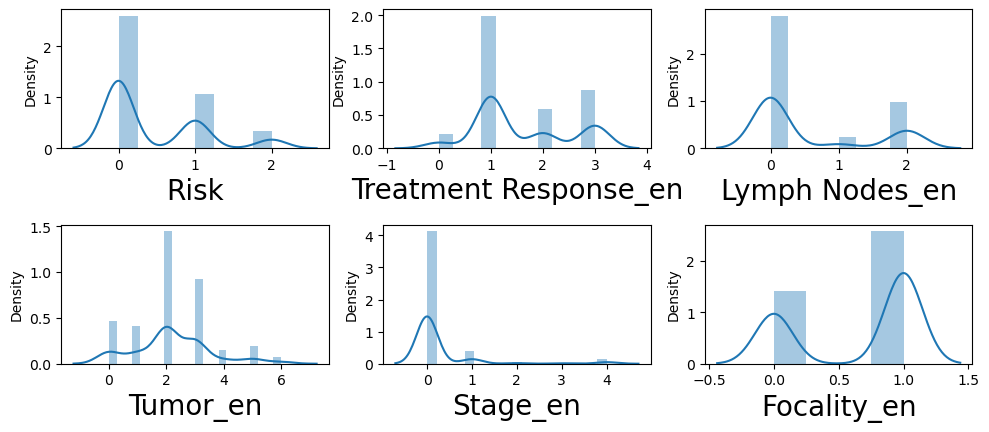

In [21]:
plt.figure(figsize=(10,6))
plotnumber = 1

for column in df_1:
    if plotnumber<= 6:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df_1[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1   
plt.tight_layout() 

Insights: there is no outliers so don't need to apply VIF or Z-Score method

# Data Visualization

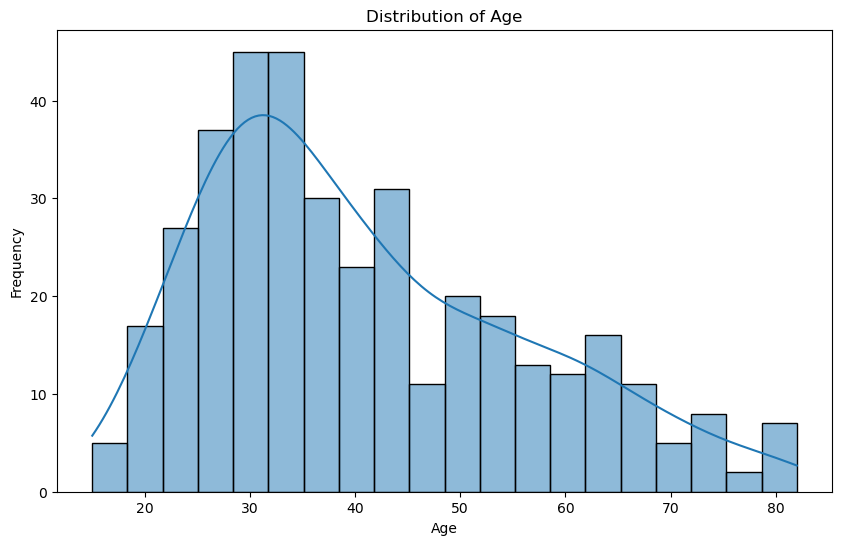

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df_1['Age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

Insight: From the above plot we can conclude that the majority of patients have a 40 and 41 years old

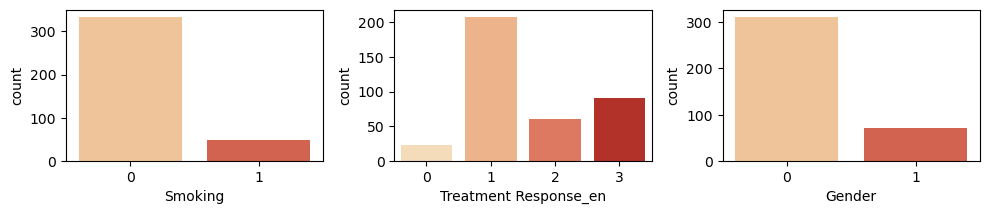

In [23]:
plt.figure(figsize=(10,6))
plotnumber = 1

for column in df_1[['Smoking','Treatment Response_en','Gender']]:
    if plotnumber<= 6:
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(df_1[column],palette='OrRd')
        plt.xlabel(column,fontsize=10)
        
    plotnumber+=1   
plt.tight_layout() 

1.From the above plot we conclude that the majority of people who has a thyroid Cancer are Female

2.Smoking does not affect on the thyroid cancer

3.Rate of recovery from the Thyroid cancer are very large

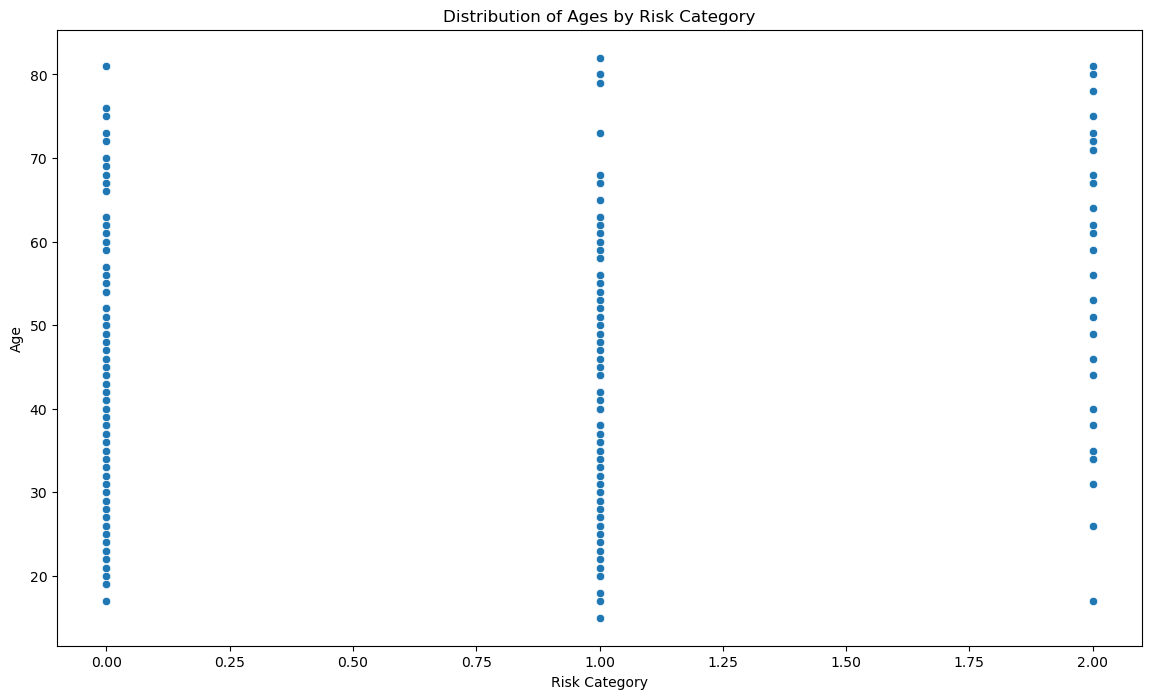

In [24]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Risk', y='Age', data=df, palette='OrRd')
plt.title('Distribution of Ages by Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Age')
plt.show()

# we check multicolinearity using heat map

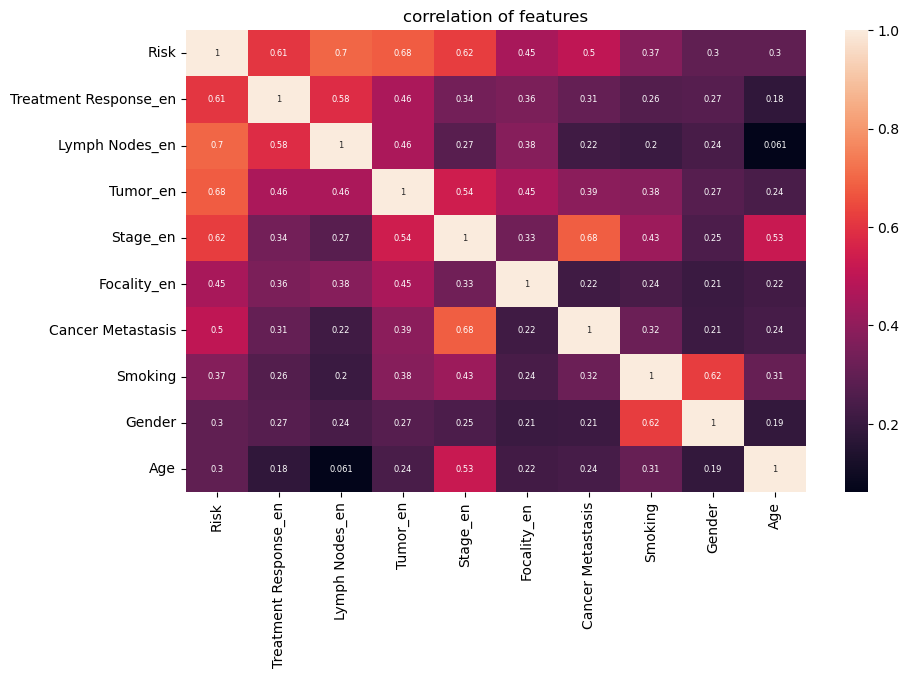

In [25]:
df_corr = df_1.corr().abs()

plt.figure(figsize=(10,6))
sns.heatmap(df_corr, annot=True, annot_kws={'size': 6})
plt.title('correlation of features')
plt.show()

Insight: There are no correlation about each other of features.so no need to drop any feature

In [26]:
# Select the top 10 features based on ANOVA F-test

# k_best = SelectKBest(score_func=f_classif, k=10)
# X_train_best = k_best.fit_transform(x_train, y_train)
# X_test_best = k_best.transform(x_test)



# Split the model into train and test

In [27]:
x_train, x_test, y_train, y_test = train_test_split(df_1, y, test_size=0.2, random_state=42)

# Model Prediction

In [28]:
def metric_score(clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        print('\n--------------------------Train result----------------------------------')
        print(f"Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%")
        print("Classification Report:\n", classification_report(y_train, y_pred))
    else:
        y_pred = clf.predict(x_test)
        print('\n--------------------------Test result----------------------------------')
        print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
        print("Classification Report:\n", classification_report(y_test, y_pred))

# Rabdom forest

In [29]:
# Model Training

clf = RandomForestClassifier(random_state=42)
clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [30]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)

metric_score(clf,x_train,x_test,y_train,y_test, train=False)


--------------------------Train result----------------------------------
Accuracy Score: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       217
           1       1.00      1.00      1.00        89

    accuracy                           1.00       306
   macro avg       1.00      1.00      1.00       306
weighted avg       1.00      1.00      1.00       306


--------------------------Test result----------------------------------
Accuracy Score: 98.70%
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77



In [31]:
y_pred = clf.predict(x_test)

print('Random Forest Classifier')
print('--'*30)
model_accuracy = round(accuracy_score(y_test, y_pred) * 100,2)
print('Accuracy', model_accuracy,'%')

Random Forest Classifier
------------------------------------------------------------
Accuracy 98.7 %


Precision: 1.00
Recall: 0.95
------------------------------------------------------------


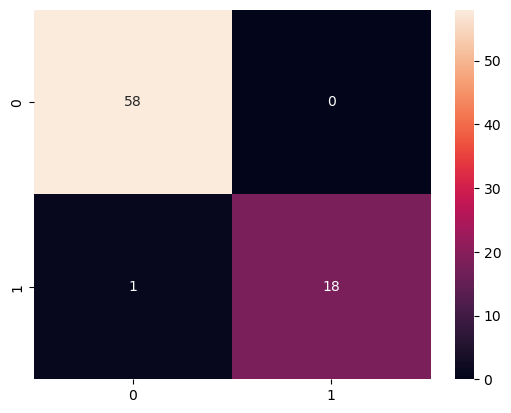

In [32]:
cm = confusion_matrix(y_test, y_pred)

cm

sns.heatmap(cm, annot=True, fmt="d")

# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)

Comments:

The model demonstrates exceptional precision and recall for both classes.
It maintains a strong balance between precision and recall, with only a slight decrease in recall for class "Yes".
-----------------------------------------------
This Model's Accuraccy is 98%

# Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [34]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)

metric_score(clf,x_train,x_test,y_train,y_test, train=False)


--------------------------Train result----------------------------------
Accuracy Score: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       217
           1       1.00      1.00      1.00        89

    accuracy                           1.00       306
   macro avg       1.00      1.00      1.00       306
weighted avg       1.00      1.00      1.00       306


--------------------------Test result----------------------------------
Accuracy Score: 92.21%
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        58
           1       0.84      0.84      0.84        19

    accuracy                           0.92        77
   macro avg       0.90      0.90      0.90        77
weighted avg       0.92      0.92      0.92        77



In [35]:
y_pred = clf.predict(x_test)

print('Decision Tree Classifier')
print('--'*30)
Dtree_accuracy = round(accuracy_score(y_test, y_pred) * 100,2)
print('Accuracy', Dtree_accuracy,'%')

Decision Tree Classifier
------------------------------------------------------------
Accuracy 92.21 %


Precision: 0.84
Recall: 0.84
------------------------------------------------------------


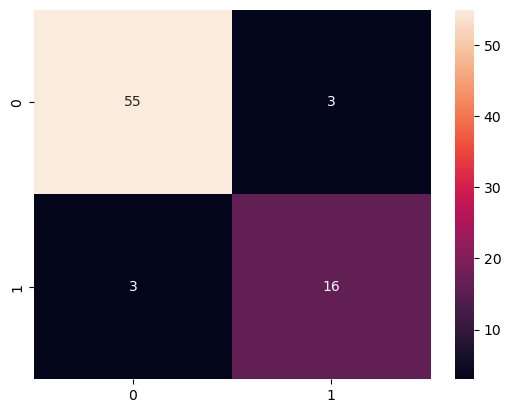

In [36]:
cm = confusion_matrix(y_test, y_pred)

cm

sns.heatmap(cm, annot=True, fmt="d")

# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)

Comments:

The model demonstrates exceptional precision and recall for both classes.
It maintains a strong balance between precision and recall.
-------------------------------------------------------------------
This Model's Accuracy is 92%